In [1]:
from stesml.model_tools import final_train
from stesml.model_tools import validate_model
from stesml.model_tools import get_T_from_h_results

from stesml.data_tools import load_data

from stesml.plot_tools import plot_test_results
from stesml.plot_tools import plot_average_error

import datetime

from tensorflow import keras

from stesml.stes_model import stes_model

import xgboost as xgb

/Users/kmenear/Projects/envSulfurTES/lib/python3.9/site-packages/xgboost/compat.py:36: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import MultiIndex, Int64Index
/Users/kmenear/Projects/envSulfurTES/lib/python3.9/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
data_dir = "../data/Sulfur_Models/heating/heating_all"
model_name = 'XGBoost_20220707-12.json'
model_type = 'XGBoost' # Options: NN, XGBoost, RandomForest
target = 'h' # Options: Tavg, h
metric = 'rmse' # Options: rmse, r2
scale = False # Normalize data to a mean of 0 and STD of 1
t_min = 360

In [3]:
parameters = stes_model.get_parameters(model_type)

In [ ]:
train_model = False

if train_model:
    model, addendum = final_train(data_dir, model_type, target, scale, parameters, t_min=t_min)

In [6]:
save_model_and_addendum = False

if save_model_and_addendum:
    stes_model.save_model(model, model_type)

In [ ]:
load_model_and_addendum = False
    
if load_model_and_addendum:
    model, addendum = stes_model.load_model(model_type, model_name)

In [21]:
results = validate_model(model, model_type, data_dir, target, scale, addendum, t_min)

RMSE: 4.1675373, R2: 0.8710444


In [12]:
h_df = results['val_df']

In [ ]:
avg_error = plot_average_error(h_df, target=target, t_max=t_max)

In [ ]:
(h_df['h'] - h_df['h_hat']).hist(bins=20, range=(-30, 30))

In [ ]:
plot_test_results(h_df, model_type, target='h')

In [5]:
data_dir = "../data/Sulfur_Models/heating/heating_all"
model_name = 'NN_20220701-19'
model_type = 'NN' # Options: NN, XGBoost, RandomForest
target = 'Tavg' # Options: Tavg, h
metric = 'rmse' # Options: rmse, r2
scale = True # Normalize data to a mean of 0 and STD of 1

In [6]:
parameters = stes_model.get_parameters(model_type)

In [7]:
train_model = False

if train_model:
    model, addendum = final_train(data_dir, model_type, target, scale, parameters, t_min=t_min)

2022-07-08 18:14:12.175647: I tensorflow/core/platform/cpu_feature_guard.cc:142] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE4.1 SSE4.2 AVX AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2022-07-08 18:14:12.245470: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:116] None of the MLIR optimization passes are enabled (registered 2)


Epoch 1/9
28191/28191 [==============================] - 22s 781us/step - loss: 0.0112 - val_loss: 4.7050e-05
Epoch 2/9
28191/28191 [==============================] - 22s 792us/step - loss: 3.6462e-05 - val_loss: 1.9879e-05
Epoch 3/9
28191/28191 [==============================] - 22s 794us/step - loss: 2.8376e-05 - val_loss: 2.2893e-05
Epoch 4/9
28191/28191 [==============================] - 23s 817us/step - loss: 2.4732e-05 - val_loss: 1.3877e-05
Epoch 5/9
28191/28191 [==============================] - 23s 820us/step - loss: 2.4122e-05 - val_loss: 1.2082e-04
Epoch 6/9
28191/28191 [==============================] - 22s 787us/step - loss: 2.1840e-05 - val_loss: 1.0540e-05
Epoch 7/9
28191/28191 [==============================] - 22s 788us/step - loss: 1.9688e-05 - val_loss: 8.6137e-06
Epoch 8/9
28191/28191 [==============================] - 22s 789us/step - loss: 1.9398e-05 - val_loss: 3.2964e-05
Epoch 9/9
28191/28191 [==============================] - 22s 792us/step - loss: 2.0176e-05 -

In [8]:
save_model_and_addendum = False

if save_model_and_addendum:
    stes_model.save_model(model, model_type)

2022-07-08 18:17:34.520421: W tensorflow/python/util/util.cc:348] Sets are not currently considered sequences, but this may change in the future, so consider avoiding using them.


INFO:tensorflow:Assets written to: ../models/NN_20220708-18/assets


In [ ]:
load_model_and_addendum = False

if load_model_and_addendum:
    model, addendum = stes_model.load_model(model_type, model_name)

In [10]:
t_max=360
results = validate_model(model, model_type, data_dir, target, scale, addendum, t_max=t_max)

RMSE: 0.2614, R2: 1.0000


In [11]:
T_df = results['val_df']

In [22]:
h_df['Tavg_hat'] = T_df['Tavg_hat']

ValueError: x and y must have same first dimension, but have shapes (3620,) and (3613,)

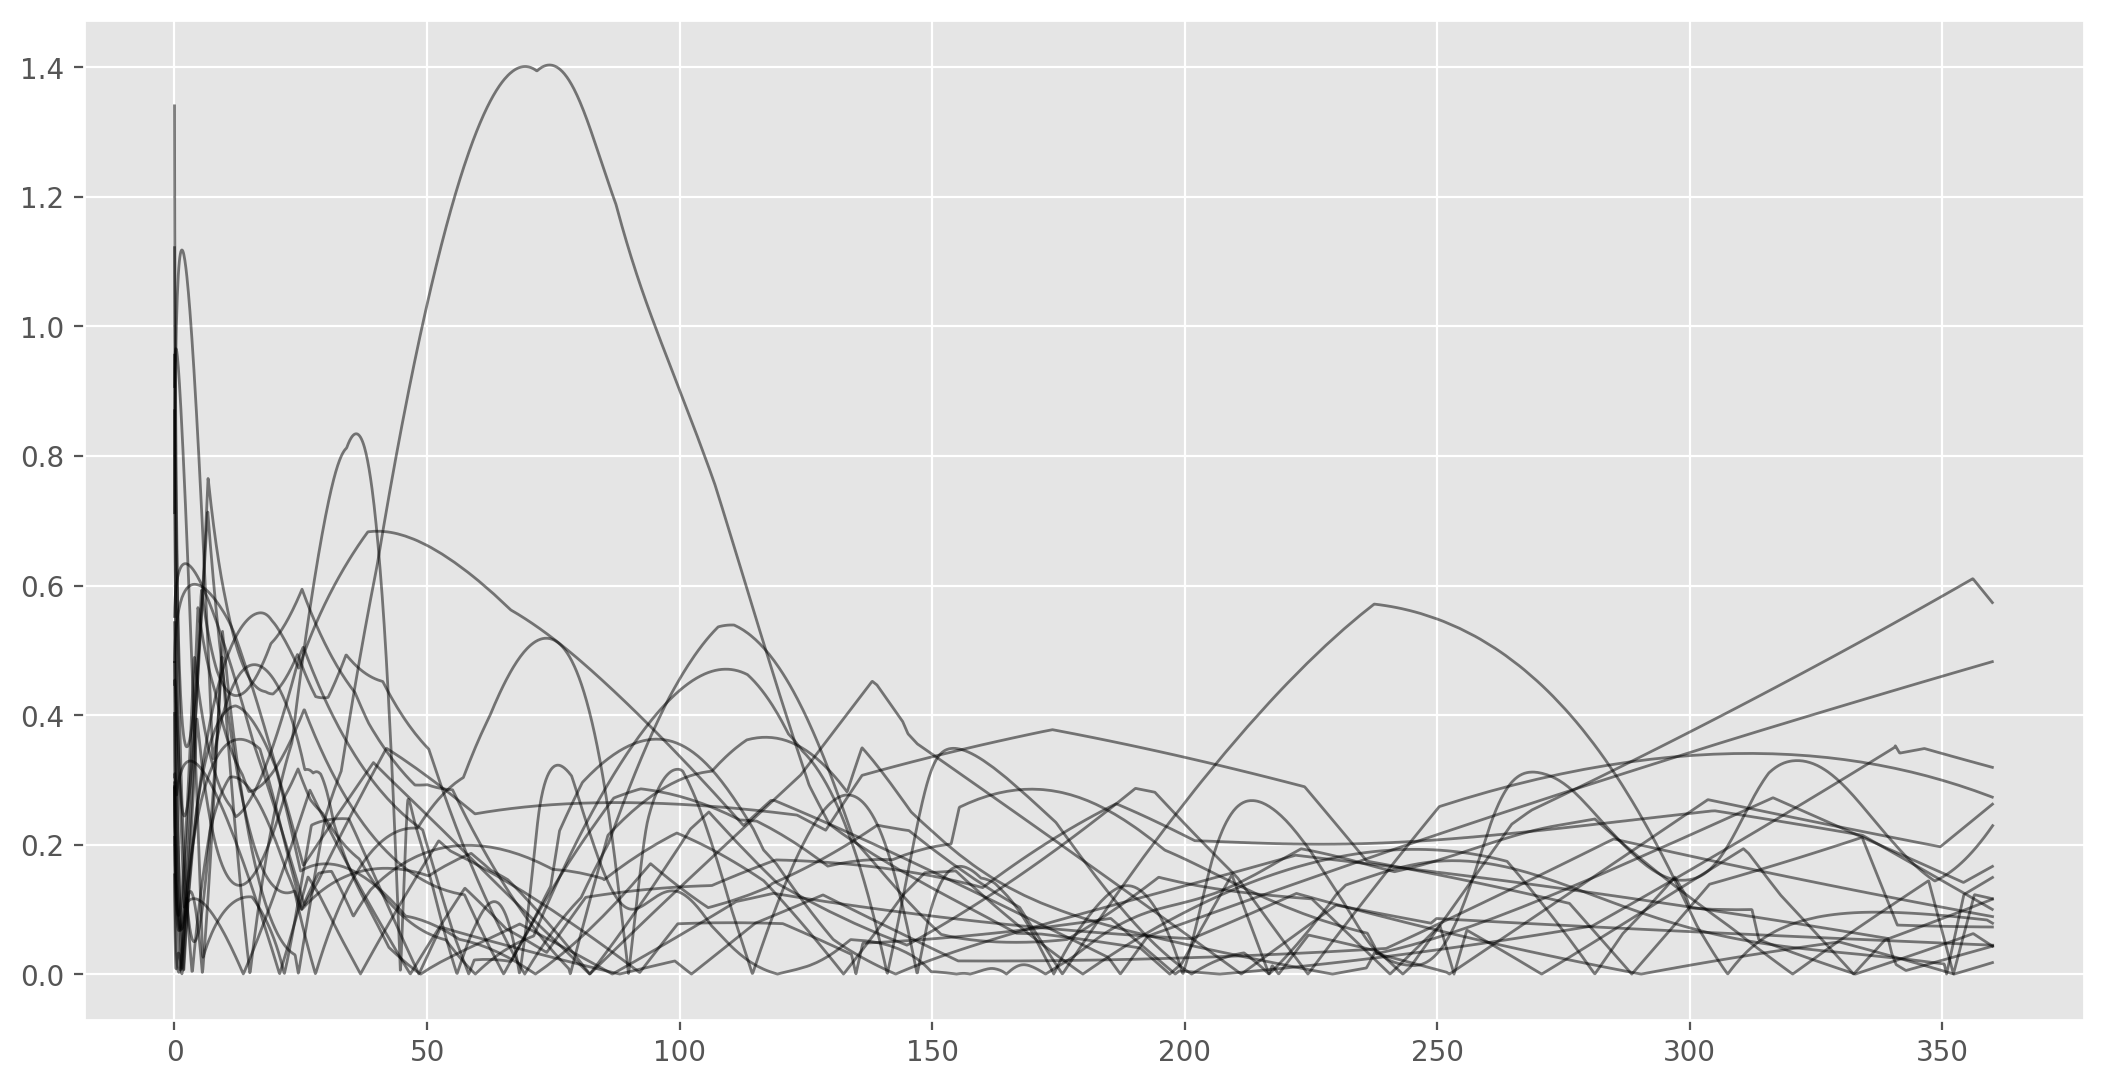

In [13]:
avg_error = plot_average_error(T_df, target=target, t_max=t_max)

<AxesSubplot:>

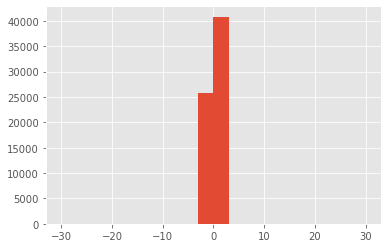

In [14]:
(T_df['Tavg'] - T_df['Tavg_hat']).hist(bins=20, range=(-30, 30))

In [ ]:
plot_test_results(T_df, model_type, target='Tavg')

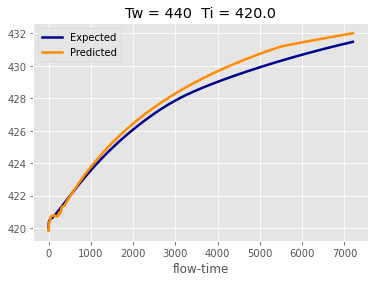

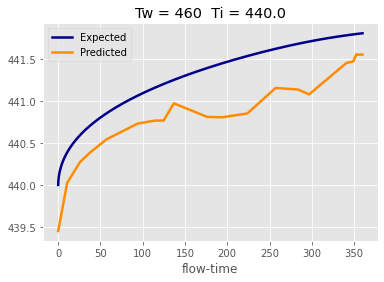

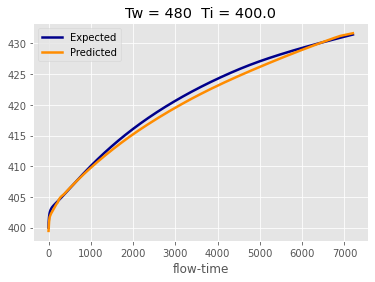

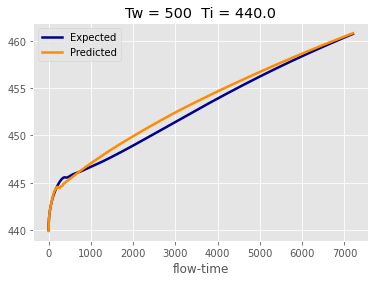

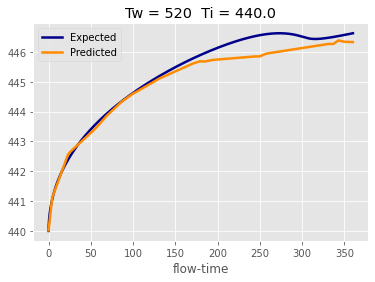

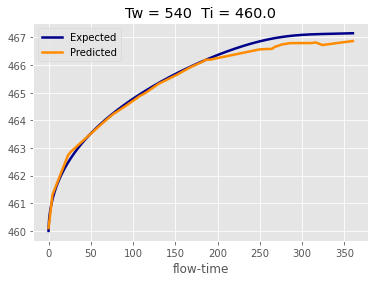

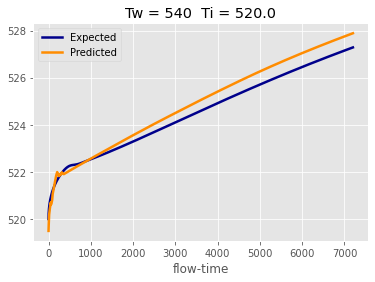

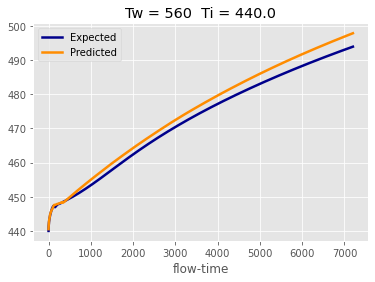

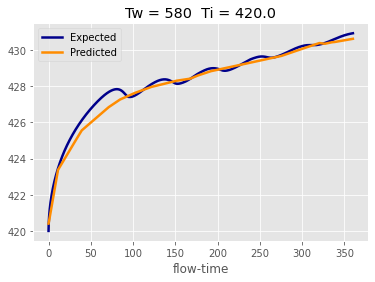

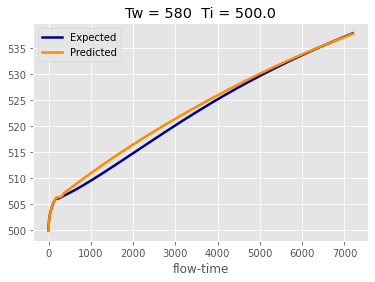

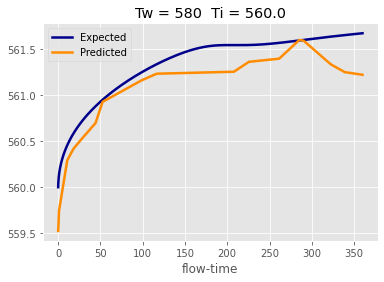

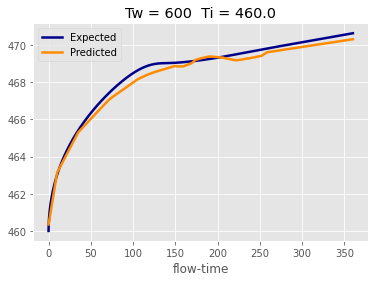

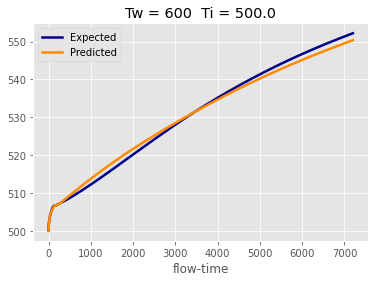

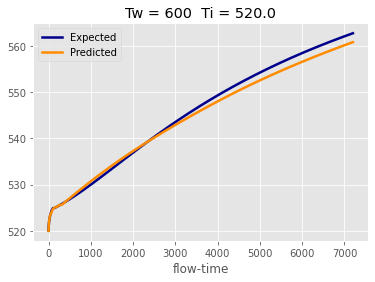

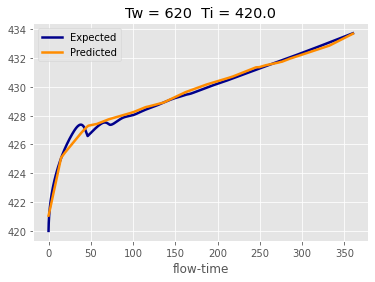

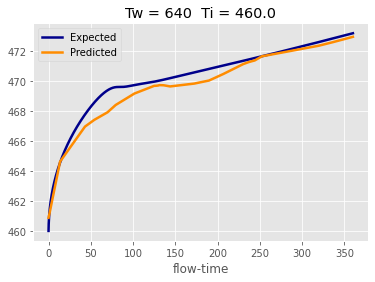

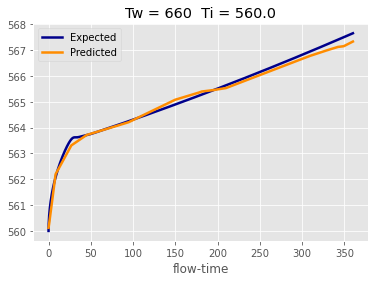

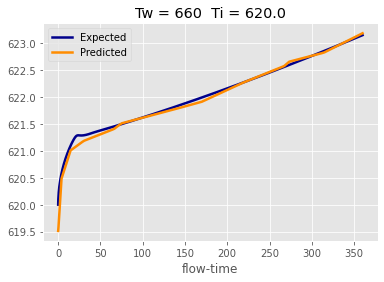

In [28]:
rmse, r2 = get_T_from_h_results(h_df, plot=True)

In [29]:
print(rmse)

1.1983298282345733


In [30]:
print(r2)

0.9993952529877494
